# Problem #1

In [35]:

input = open('p10.txt', mode='r')

In [36]:
rules = {'noop': 1, 'addx': 2}
result = []


def process(input, result):
    regX, cycles = 1, 0
    spot_cycle = 20
    while True:
        action = input.readline().strip('\n').split()
        if not action: break

        n_cycles = rules[action[0]]
        if n_cycles==2: value = int(action[1])
        else:       value=0

        cycles += n_cycles
        if cycles >= spot_cycle:
            result.append(spot_cycle * regX)
            spot_cycle += 40
        regX += value
    return sum(result)
    

In [37]:
process(input, result)

15140

# Problem #2

In [73]:
import numpy as np
from matplotlib import pyplot as plt

In [76]:
class sprite_ctrl:
    rules = {'noop': 1, 'addx': 2}
    def __init__(self) -> None:
        self.regX = 1
        self.load = 0
        self.value=0

    def update(self, input):
        if not self.load:
            action = input.readline().strip('\n').split()
            if action:
                self.regX += self.value
                self.load = rules[action[0]]
                if self.load==2: self.value = int(action[1])
                else:       self.value = 0
        self.load -= 1
        return np.array([-1,0,1]) + self.regX

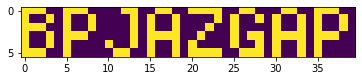

In [77]:
input = open('p10.txt', mode='r')
screen = np.zeros([6,40])
sprite_obj = sprite_ctrl()

for j in range (6):
    for i in range(40):
        screen[j,i] =  (i in sprite_obj.update(input))
plt.imshow(screen)